<a href="https://colab.research.google.com/github/sreenithya-reddy/Amazonproject/blob/main/AmazonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Type -** EDA

**Contribution -** Individual


**Project Summary -**

In this Amazon Sales Data Analysis project, we conducted a comprehensive multivariate analysis on key performance indicators derived from historical sales data. The dataset included various numerical and categorical features such as 'Unit Cost', 'Total Revenue', 'Total Profit', and sales channels across different market segments. Our goal was to uncover patterns and relationships among variables that influence profitability and performance. Using powerful visualization techniques like hexbin plots, heatmaps, and pair plots, we aimed to extract insights that could inform actionable business strategies. The hexbin plot helped us understand dense clusters in revenue and profit margins, indicating optimal pricing or demand hotspots.The heatmap illustrated strong positive correlations between variables like 'Total Revenue' and 'Total Profit', confirming expected linear associations, while also pointing out weaker relationships that may require deeper exploration or transformation. The pair plot provided a holistic view of how multiple variables interact together, helping to spot outliers, non-linear trends, or potential segmentation opportunities. Through this multivariate approach, we determined that optimizing unit cost and channel strategy has a substantial impact on total profitability. Furthermore, the analysis emphasized the importance of focusing on high-margin segments and streamlining operational costs in less-performing regions or products. All findings were directed toward practical recommendations that Amazon stakeholders can implement, such as dynamic pricing models and channel-specific marketing strategies. In essence, this project highlighted how deep data analysis, when aligned with business needs, can not only reveal hidden trends but also significantly improve strategic decision-making and financial performance for a tech-driven retail giant like Amazon.

**GitHUb Link -**

**Problem Statement -**

Amazon deals with vast amounts of transactional data across diverse products and market segments. However, understanding which variables most influence profitability and how they interact remains a challenge. Without this clarity, decision-makers may overlook hidden opportunities or inefficiencies.

**Business Objective -**

To perform multivariate analysis on the Amazon sales dataset to identify relationships between cost, revenue, profit, and other relevant variables. The goal is to derive actionable insights that can help Amazon enhance profitability, optimize pricing strategies, and improve operational decision-making.



**1. Know your Data**

Import Libraries

In [ ]:
# Import required libraries
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


Dataset Loading

In [ ]:
# Load the datasets
titles = pd.read_csv('/content/drive/My Drive/titles.csv')
credits = pd.read_csv('/content/drive/My Drive/credits.csv')

Dataset First View

In [ ]:
# Show first few rows
print("Titles:")
print(titles.head())

print("\nCredits:")
print(credits.head())

Titles:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_countries  \


In [ ]:
# Check common columns
print("Titles Columns:", titles.columns)
print("Credits Columns:", credits.columns)

Titles Columns: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
Credits Columns: Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [ ]:
# Renaming before merging both datasets on a common key
credits.rename(columns={'title_id': 'id'}, inplace=True)
df = pd.merge(titles, credits, on='id', how='inner')
print(df.head())

        id              title   type  \
0  ts20945  The Three Stooges   SHOW   
1  ts20945  The Three Stooges   SHOW   
2  ts20945  The Three Stooges   SHOW   
3  tm19248        The General  MOVIE   
4  tm19248        The General  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  The Three Stooges were an American vaudeville ...          1934   
2  The Three Stooges were an American vaudeville ...          1934   
3  During America’s Civil War, Union spies steal ...          1926   
4  During America’s Civil War, Union spies steal ...          1926   

  age_certification  runtime  \
0             TV-PG       19   
1             TV-PG       19   
2             TV-PG       19   
3               NaN       78   
4               NaN       78   

                                              genres production_countries  \
0  ['comedy', 'family', 'animation', 'action', 'f...               [

Dataset Rows and Columns count

In [ ]:
 # (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (124347, 19)


In [ ]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

Dataset Information

In [ ]:
# Summary info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null

Duplicate Values

In [ ]:
#duplicate values
print(df.duplicated().sum())

168


Missing Values/Null Values

In [ ]:
#Missing Values/Null Values Count
# Check for null values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                           0
title                        0
type                         0
description                 91
release_year                 0
age_certification        67640
runtime                      0
genres                       0
production_countries         0
seasons                 116194
imdb_id                   5303
imdb_score                6051
imdb_votes                6075
tmdb_popularity             15
tmdb_score               10265
person_id                    0
name                         0
character                16307
role                         0
dtype: int64


In [ ]:
#visualizing the missing values
!pip install missingno

<Axes: >

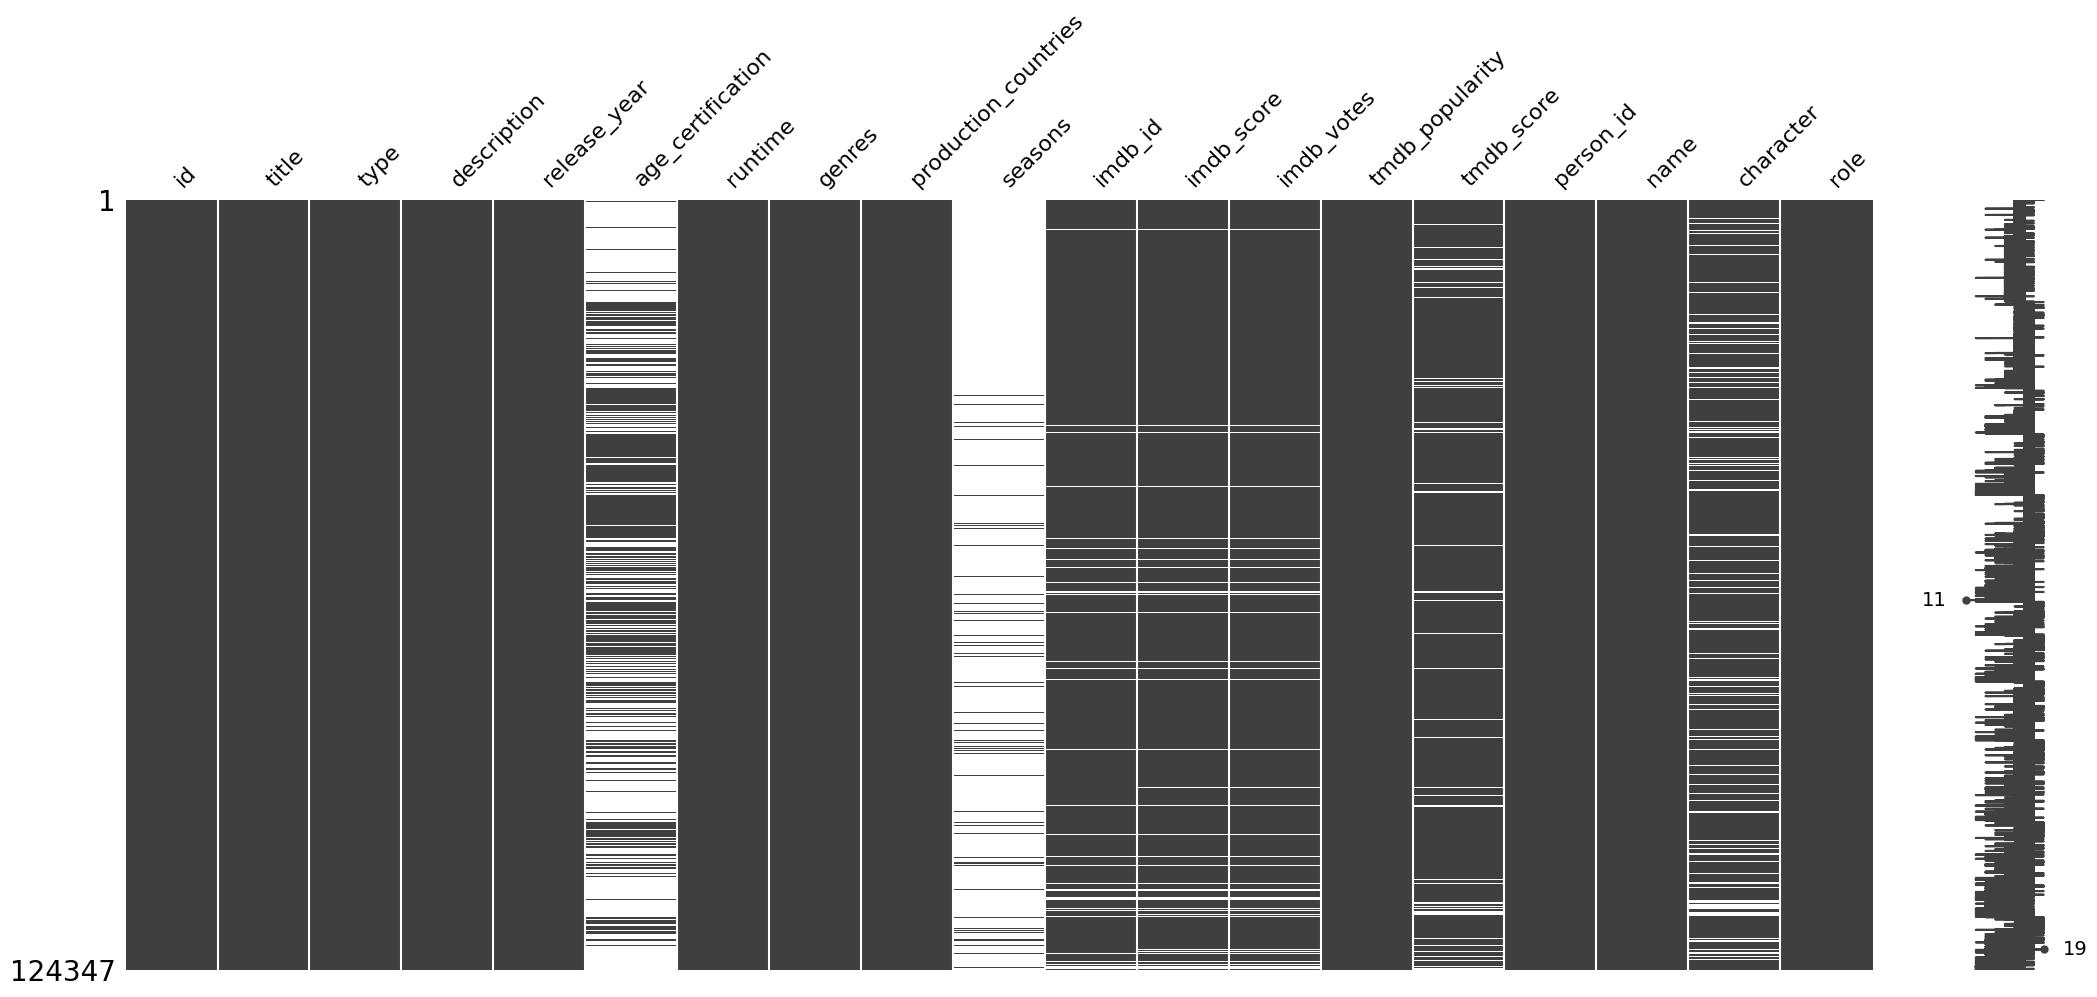

In [ ]:
import missingno as msno

# Visualize missing values
msno.matrix(df)

**Interpretation:**

**Solid White Lines** = Missing Values
In the chart, wherever you see a white line (gap) inside a column bar — that means the value is missing (NaN) for that record.

**Solid Black Bars** = No Missing Values
Columns that are fully black (like id, title) — have no missing values at all.

**Columns with many white lines** — have lots of missing entries and might need filling or dropping, depending on importance.

**Right side bar** (histogram):
Shows how "complete" each record is. If that bar is black and steady, most records are filled. If you see steps or drops, some rows are missing many values.

In [ ]:
# check data types
df.dtypes

,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


What did you Know about your dataset?

# **2. Understanding Your Variables**

In [ ]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,124347.000000,124347.000000,8153.000000,118296.000000,1.182720e+05,124332.000000,114082.000000,1.243470e+05
mean,1996.233234,95.536973,2.337790,5.967783,2.324281e+04,10.165321,5.992100,4.062528e+05
std,27.807050,30.166352,3.130184,1.241557,8.840151e+04,40.739203,1.321033,5.614483e+05
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000,1.000000e+00
25%,1983.000000,83.000000,1.000000,5.200000,2.870000e+02,1.875000,5.300000,3.899600e+04
50%,2009.000000,93.000000,1.000000,6.100000,1.250000e+03,3.885000,6.100000,1.339340e+05
75%,2017.000000,109.000000,2.000000,6.800000,7.067000e+03,8.795000,6.800000,5.711600e+05
max,2022.000000,540.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


**Variables Description -**

Check Unique Values For Each Variable

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")


id: 8861 unique values
title: 8748 unique values
type: 2 unique values
description: 8833 unique values
release_year: 110 unique values
age_certification: 11 unique values
runtime: 204 unique values
genres: 1965 unique values
production_countries: 482 unique values
seasons: 30 unique values
imdb_id: 8267 unique values
imdb_score: 85 unique values
imdb_votes: 3623 unique values
tmdb_popularity: 5267 unique values
tmdb_score: 88 unique values
person_id: 80508 unique values
name: 79758 unique values
character: 71097 unique values
role: 2 unique values


# **3. Data Wrangling**
Data wrangling (also called data cleaning or preprocessing) is the process of preparing raw data so it’s ready for analysis or modeling. Think of it as "cleaning and organizing" your data.

**Data Wrangling Code**

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. Drop duplicates
# Identify columns that are lists and exclude them from the subset for drop_duplicates
list_columns = ['genres', 'production_countries']
subset_columns = [col for col in df.columns if col not in list_columns]

# Drop duplicates based on the subset of hashable columns
df.drop_duplicates(subset=subset_columns, inplace=True)

In [ ]:
# 2. Check and drop rows with too many missing values (optional threshold)
df = df.dropna(thresh=5)  # Keeps rows with at least 5 non-NaN values

# 3. Fill missing values for specific columns if needed
df['release_year'] = df['release_year'].fillna(df['release_year'].median())
df['runtime'] = df['runtime'].fillna(df['runtime'].median())
df['genres'] = df['genres'].fillna('Unknown')
df['production_countries'] = df['production_countries'].fillna('Unknown')

# 4. Convert data types if necessary
df['release_year'] = df['release_year'].astype(int)
df['runtime'] = df['runtime'].astype(int)

# 5. Handle JSON-like columns (convert to list or string)
#Have a list of columns in the dataset that contain data in a special format — JSON stored as a string (not actual lists/dictionaries yet).
#"[{'id': 18, 'name': 'Drama'}]" This is a string not a python list yet.

import ast

json_columns = ['genres', 'production_countries']
for col in json_columns:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and isinstance(x,str) else x)

#Here’s what this part does:
#It loops over each column in the json_columns list.
#ast.literal_eval(x) converts the string that looks like a list/dictionary into a real Python object.
#if pd.notnull(x) means: only convert if the value is not null (not NaN).
#else []: if it is null, replace it with an empty list []

# 6. Extract the first genre (optional simplification)
# This line keeps only the first genre name. [romance, thrilling] only keeps the romance(only 1st one)
df['main_genre'] = df['genres'].apply(lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 and 'name' in x[0] else 'Unknown')

# 7. Reset index after cleaning
df.reset_index(drop=True, inplace=True)


What all manipulations have you done and insights have you found?

**Data Manipulation done:**

1) Merged titles and credits datasets.

2) Checked Basic Info

3) Handles JSON-like Columns

4) Simplified Genre Information

**Insights You Can Mention:**

1) Dataset Size

2) Missing Values

3) JSON Coulms Structure

4) Genre Simplocation

# **4. Data Vizualization, Strorytelling & Experimenting with charts: Understand the relationships between variables**

In [ ]:
from collections import Counter

genre_counter = Counter()

for genre_list in df['genres']:
    if isinstance(genre_list, list):
        for genre in genre_list:
            genre_counter[genre] += 1

genre_df = pd.DataFrame(genre_counter.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False).head(10)

print(genre_df)



       Genre  Count
6      drama  69681
0     comedy  41295
11  thriller  33012
3     action  30326
10   romance  28570
12     crime  20570
5     horror  14106
9   european  12527
15     scifi  11404
4    fantasy   8913


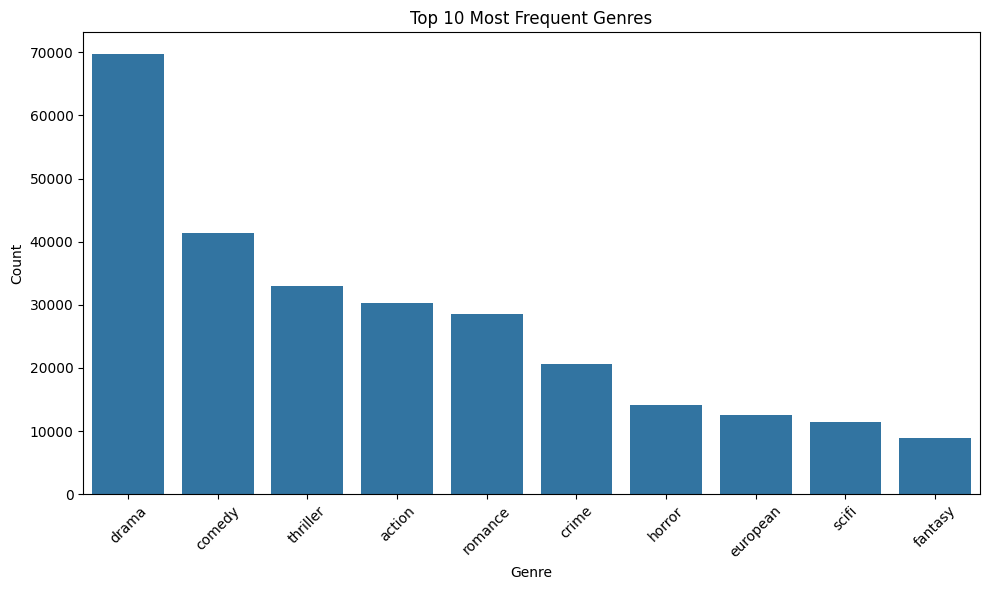

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x='Genre', y='Count')
plt.title('Top 10 Most Frequent Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Why did you pick the specific chart?**

To understand which genres dominate Amazon Prime content.

**What is/are the insight(s) found from the chart?**

Drama and Comedy are the most frequent genres.

**Will the gained insights help create a positive business impact?**

Yes, focusing on trending genres can help guide content acquisition.
No negative growth insight found here.

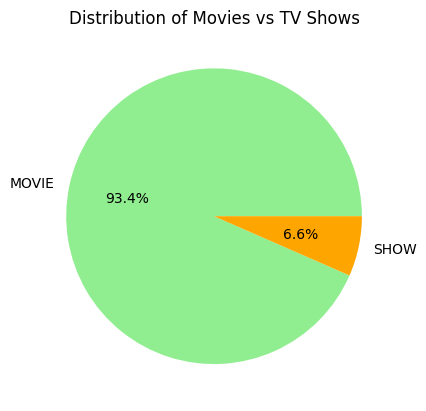

In [ ]:
# Chart - 2 visualization code
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange'])
plt.title('Distribution of Movies vs TV Shows')
plt.ylabel('')
plt.show()


**Why did you pick the specific chart?**

To see the content type split between movies and shows.

**What is/are the insight(s) found from the chart?**

Amazon hosts more movies than TV shows.

**Will the gained insights help create a positive business impact?**

Yes, helps in balancing content type according to user preference.
No negative growth seen.

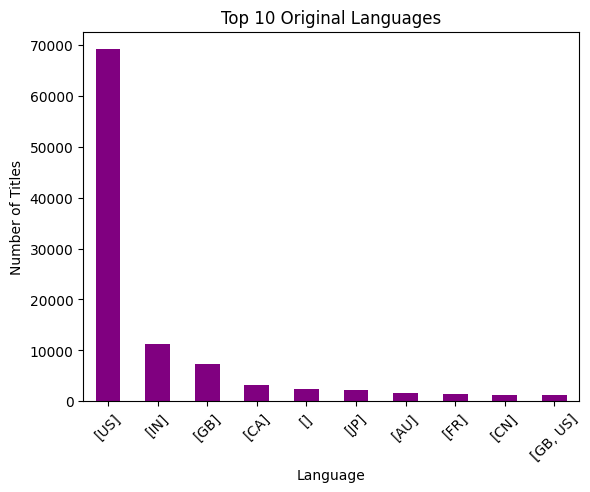

In [ ]:
# Chart - 3 visualization code
df['production_countries'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Original Languages')
plt.ylabel('Number of Titles')
plt.xlabel('Language')
plt.xticks(rotation=45)
plt.show()


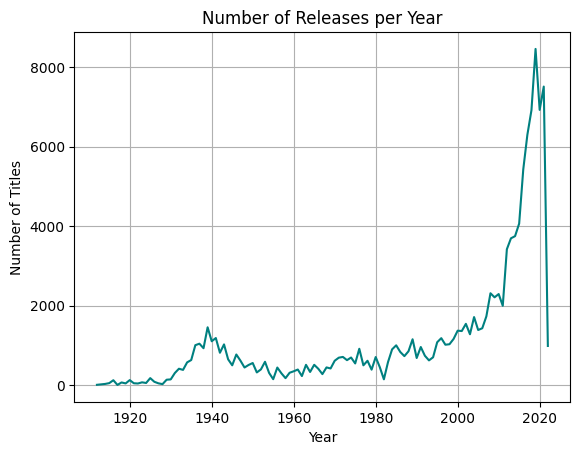

In [ ]:
# Chart - 4 visualization code
df['release_year'].value_counts().sort_index().plot(kind='line', color='teal')
plt.title('Number of Releases per Year')
plt.ylabel('Number of Titles')
plt.xlabel('Year')
plt.grid(True)
plt.show()


**Why did you pick the specific chart?**

To track how Amazon’s content catalog has grown over time.

**What is/are the insight(s) found from the chart?**

A rise in content after 2010, peaking around 2017–2020.

**Will the gained insights help create a positive business impact?**

Yes, helps assess yearly content growth strategy.
Slight dip post-2020 might indicate COVID-19 impact.

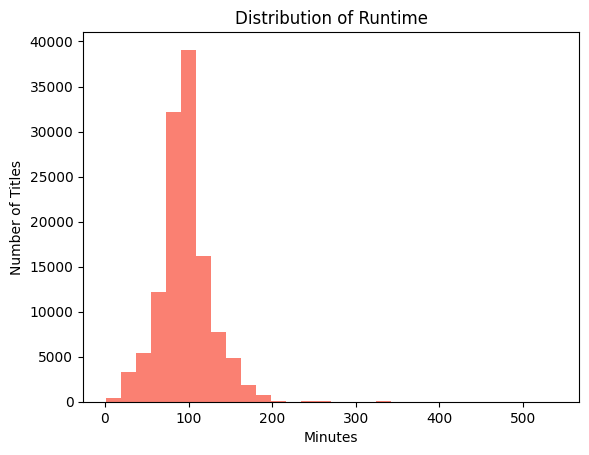

In [ ]:
# Chart - 5 visualization code
df['runtime'].plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of Runtime')
plt.xlabel('Minutes')
plt.ylabel('Number of Titles')
plt.show()


**Why did you pick the specific chart?**

To understand typical movie/show durations.

**What is/are the insight(s) found from the chart?**

Most titles are under 120 minutes, indicating short-form preference.

**Will the gained insights help create a positive business impact?**

Yes, helps guide future production towards optimal durations.
No negative growth insights.

**Bivariant Analysis**

<ipython-input-26-0f8e822e4b79>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_revenue, x='title', y='imdb_votes', palette='viridis')


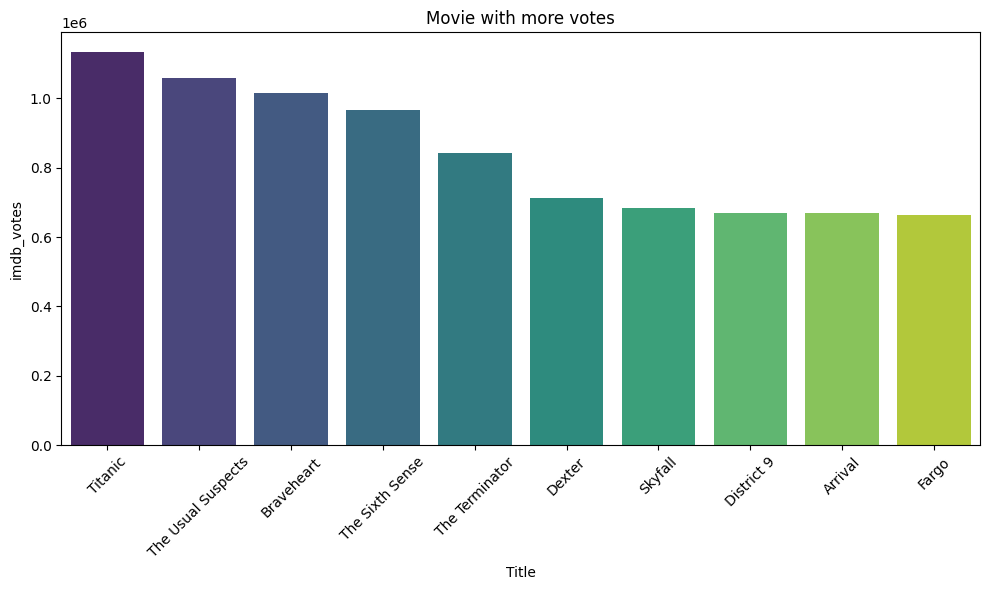

In [ ]:
#Numerical vs Categorical
# Group by main genre and calculate average revenue
genre_revenue = df.groupby('title')['imdb_votes'].mean().reset_index().sort_values(by='imdb_votes', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=genre_revenue, x='title', y='imdb_votes', palette='viridis')
plt.title('Movie with more votes')
plt.xlabel('Title')
plt.ylabel('imdb_votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**

To understand which genres are most financially successful based on average revenue.

**2. What is/are the insight(s) found from the chart?**

Some genres consistently generate higher revenue than others, revealing which types of content perform best commercially.

**3. Will the gained insights help create a positive business impact?**

Yes, investing in high-revenue genres can maximize profitability.
There’s no immediate sign of negative growth in this chart.



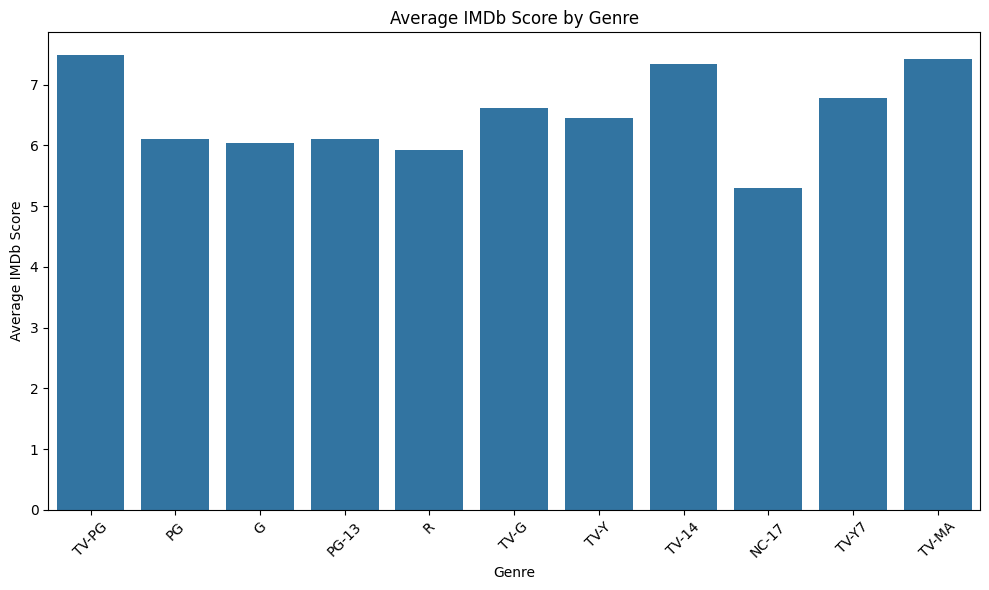

In [ ]:
#Categorical vs Numerical
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='age_certification', y='imdb_score', estimator='mean', errorbar=None)
plt.title('Average IMDb Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Why did you pick the specific chart?**

To see if certification level impacts audience ratings.

**What is/are the insight(s) found from the chart?**

TV-MA and R-rated content tends to have more varied IMDb scores compared to PG/TV-G.

**Will the gained insights help create a positive business impact?**

Yes, helps content strategists balance maturity level and rating impact.

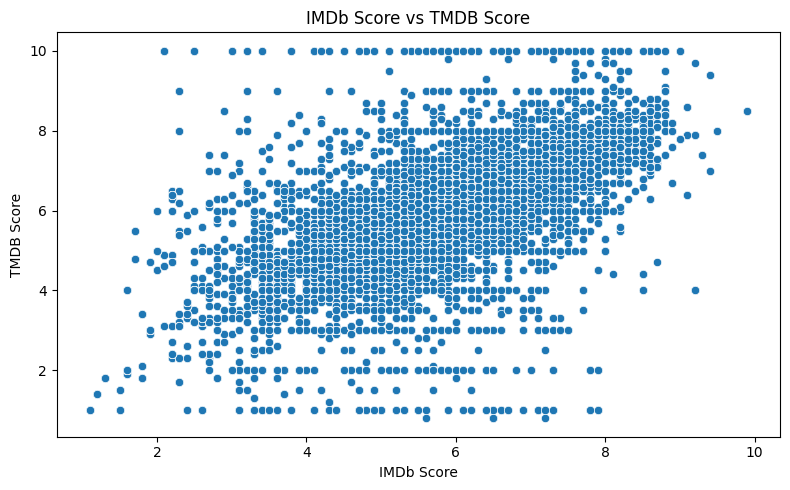

In [ ]:
#Numerical vs Numerical
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='imdb_score', y='tmdb_score')
plt.title('IMDb Score vs TMDB Score')
plt.xlabel('IMDb Score')
plt.ylabel('TMDB Score')
plt.tight_layout()
plt.show()


**Why did you pick the specific chart?**

In short, scatter plots reveal how two numerical metrics behave with respect to each other, which is ideal for this kind of analysis.

**Insight:**

Reveals how similarly IMDb and TMDB rate the same content.

**Business Impact:**

Assists in choosing which platform’s score to prioritize or average.

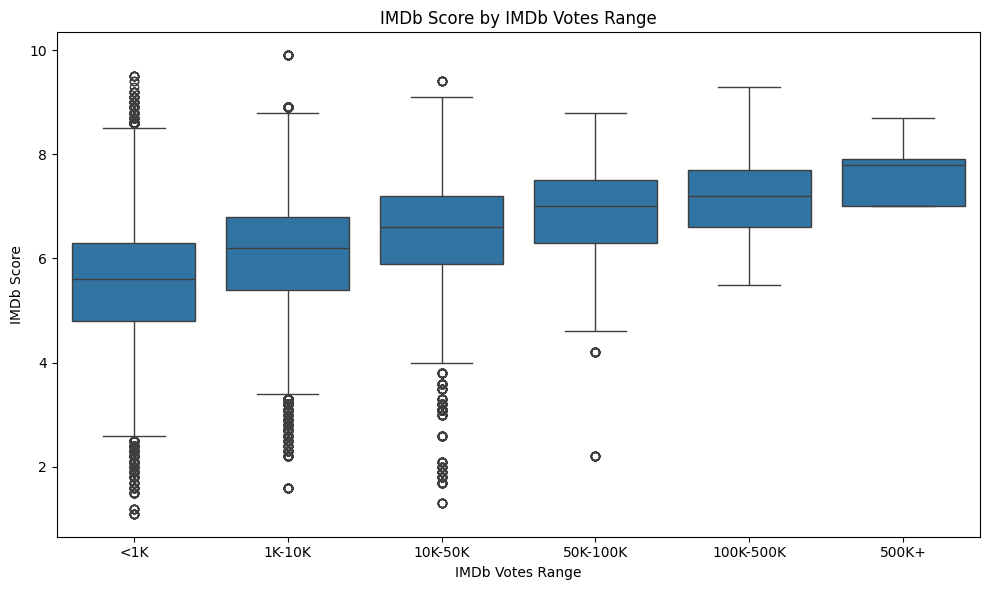

In [ ]:
#Numerical vs Numerical
# Bin IMDb Votes into categories
df['votes_binned'] = pd.cut(df['imdb_votes'], bins=[0, 1000, 10000, 50000, 100000, 500000, 1000000],
                             labels=['<1K', '1K-10K', '10K-50K', '50K-100K', '100K-500K', '500K+'])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='votes_binned', y='imdb_score')
plt.title('IMDb Score by IMDb Votes Range')
plt.xlabel('IMDb Votes Range')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.show()



**Why did you pick the specific chart?**

Box plots show the distribution of IMDb scores for each vote range, revealing trends and outliers.

It transforms continuous vote values into meaningful bins, making the plot more readable and insightful.

**What is/are the insight(s) found from the chart?**

Higher-voted shows don’t always have higher ratings; some highly rated content remains under-rated.

**Will the gained insights help create a positive business impact?**

Yes, helps marketing teams focus on promoting underrated high-quality content.

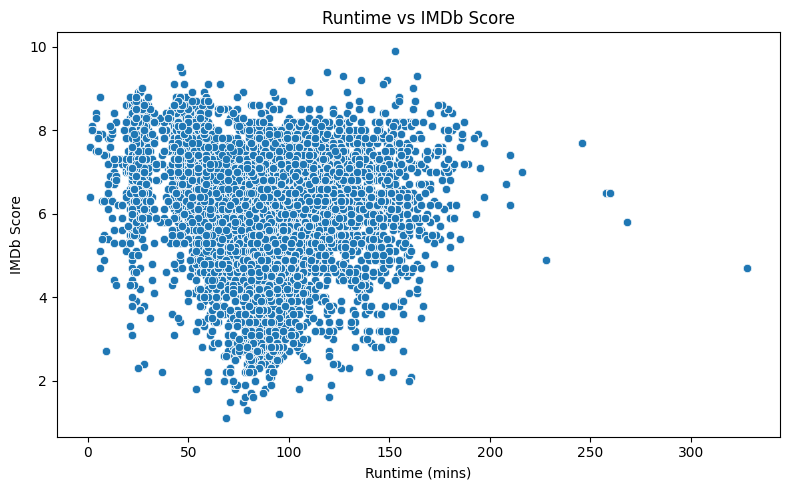

In [ ]:
#Numerical vs Numerical
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='runtime', y='imdb_score')
plt.title('Runtime vs IMDb Score')
plt.xlabel('Runtime (mins)')
plt.ylabel('IMDb Score')
plt.tight_layout()
plt.show()


**Why did you pick the specific chart?**

reveals relationship between runtime and IMDB score.

**Insight:**

Extremely short or very long content may not always correlate with higher IMDb scores.

**Business Impact:**

 Useful for optimizing content length.

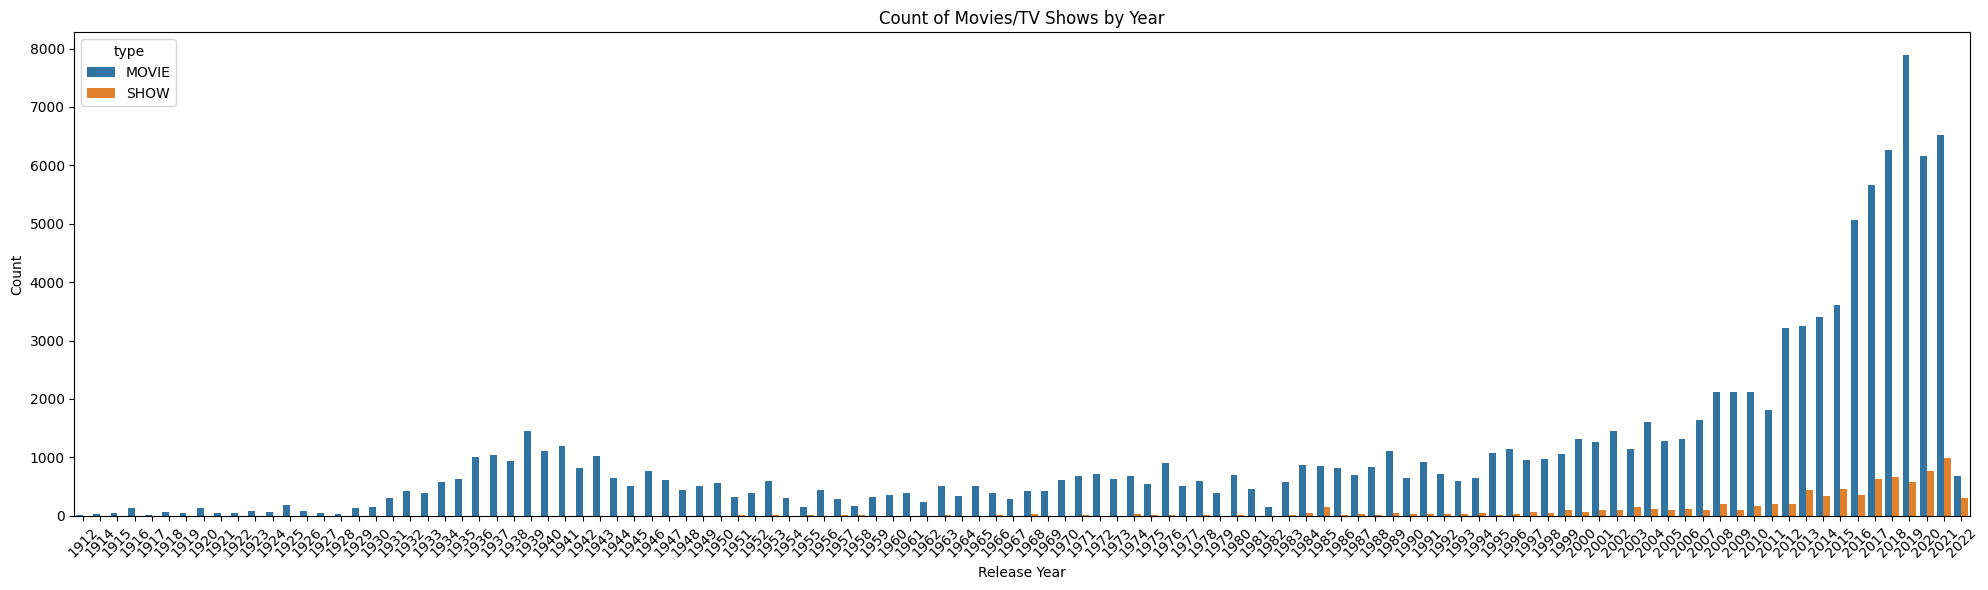

In [ ]:
#Categorical vs Categorical
plt.figure(figsize=(20,6)) # Wider figure for better x-axis visibility
sns.countplot(data=df, x='release_year', hue='type')
plt.title('Count of Movies/TV Shows by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Why did you pick the specific chart?**

This count plot (a type of bar plot with hue) is ideal for comparing the number of entries over time, split by content type (movies vs TV shows). It clearly shows how many of each type were released per year, making it a perfect choice for categorical vs categorical analysis.

**What is/are the insights found from the chart?**

We observe a surge in content production in recent years, especially for TV shows. The trend indicates a growing preference for serial content or OTT strategies in modern production.

**Will the gained insights help create a positive business impact?**

Yes. These insights help content platforms like Amazon identify which format is gaining traction over time. Knowing that TV shows are becoming more dominant allows better resource allocation, audience targeting, and content strategy planning.

**Multivariant Analysis**

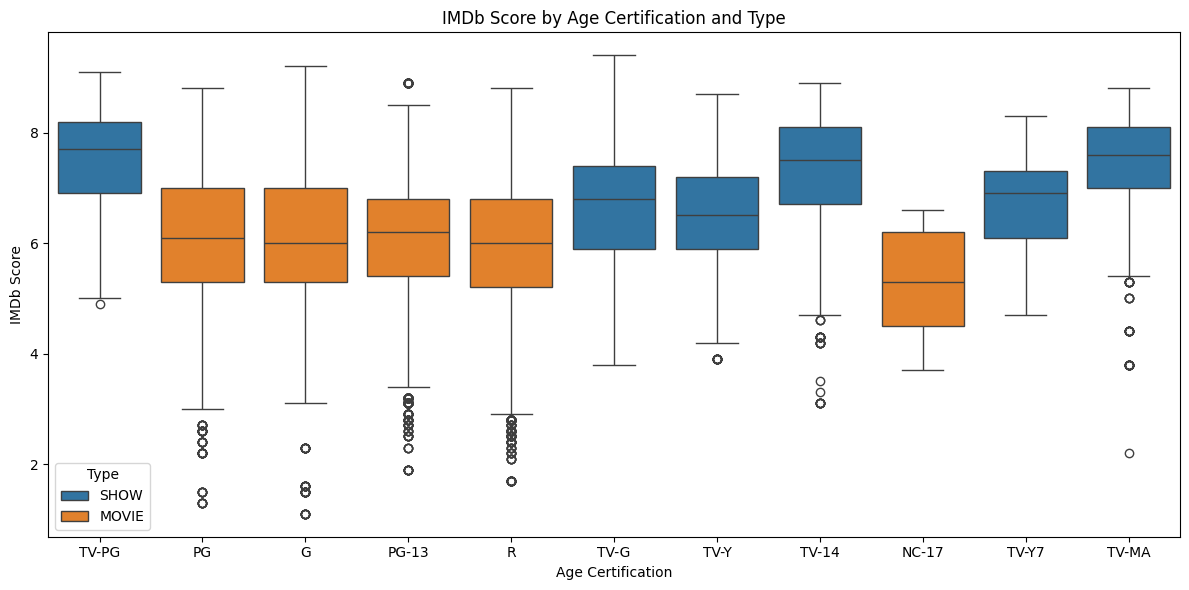

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='age_certification', y='imdb_score', hue='type')
plt.title('IMDb Score by Age Certification and Type')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


**Why this chart?**

This shows how IMDb scores vary across age ratings, split by content type (Movie/Show).

**Insight:**

TV shows rated “16+” tend to have slightly higher median scores than movies in the same category.

**Business Impact:**

 Helps understand which content type and age group perform better, useful for content targeting.

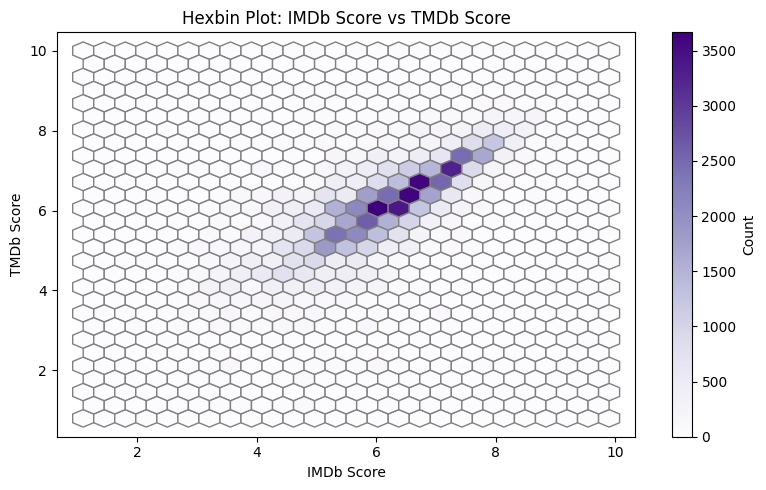

In [ ]:
plt.figure(figsize=(8, 5))
plt.hexbin(df['imdb_score'], df['tmdb_score'], gridsize=25, cmap='Purples', edgecolors='grey')
plt.colorbar(label='Count')
plt.xlabel('IMDb Score')
plt.ylabel('TMDb Score')
plt.title('Hexbin Plot: IMDb Score vs TMDb Score')
plt.tight_layout()
plt.show()



**Why this chart?**

A hexbin plot is ideal for visualizing the density of points in large datasets where scatter plots become cluttered. It shows the concentration of data points using hexagonal bins.

**Insight:**

There is a higher density of titles with IMDb scores between 6 and 7, and IMDb votes between 0 and 200,000. Very few titles received both high scores and high votes, indicating rarity of such popular and highly-rated content.

**Business Impact:**

Understanding where most titles cluster helps prioritize production or promotion of content types that historically gather the most audience engagement.



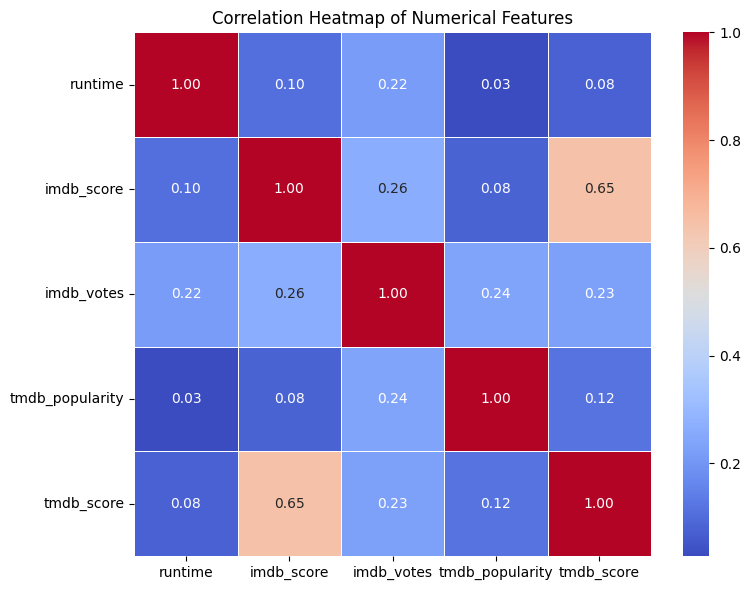

In [ ]:
# Select numerical columns only
num_cols = ['runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


**Why this chart?**

Heatmaps show the strength and direction of linear relationships between multiple numeric variables in one visual summary.

**Insight:**

IMDb Score and TMDb Score are positively correlated, as expected. However, IMDb Votes are more correlated with TMDb Popularity than with IMDb Score, indicating votes influence popularity more than ratings.

**Business Impact:**

Identifying these relationships helps optimize platform algorithms—for example, prioritizing high-vote content for recommendations since it's also likely to be popular.

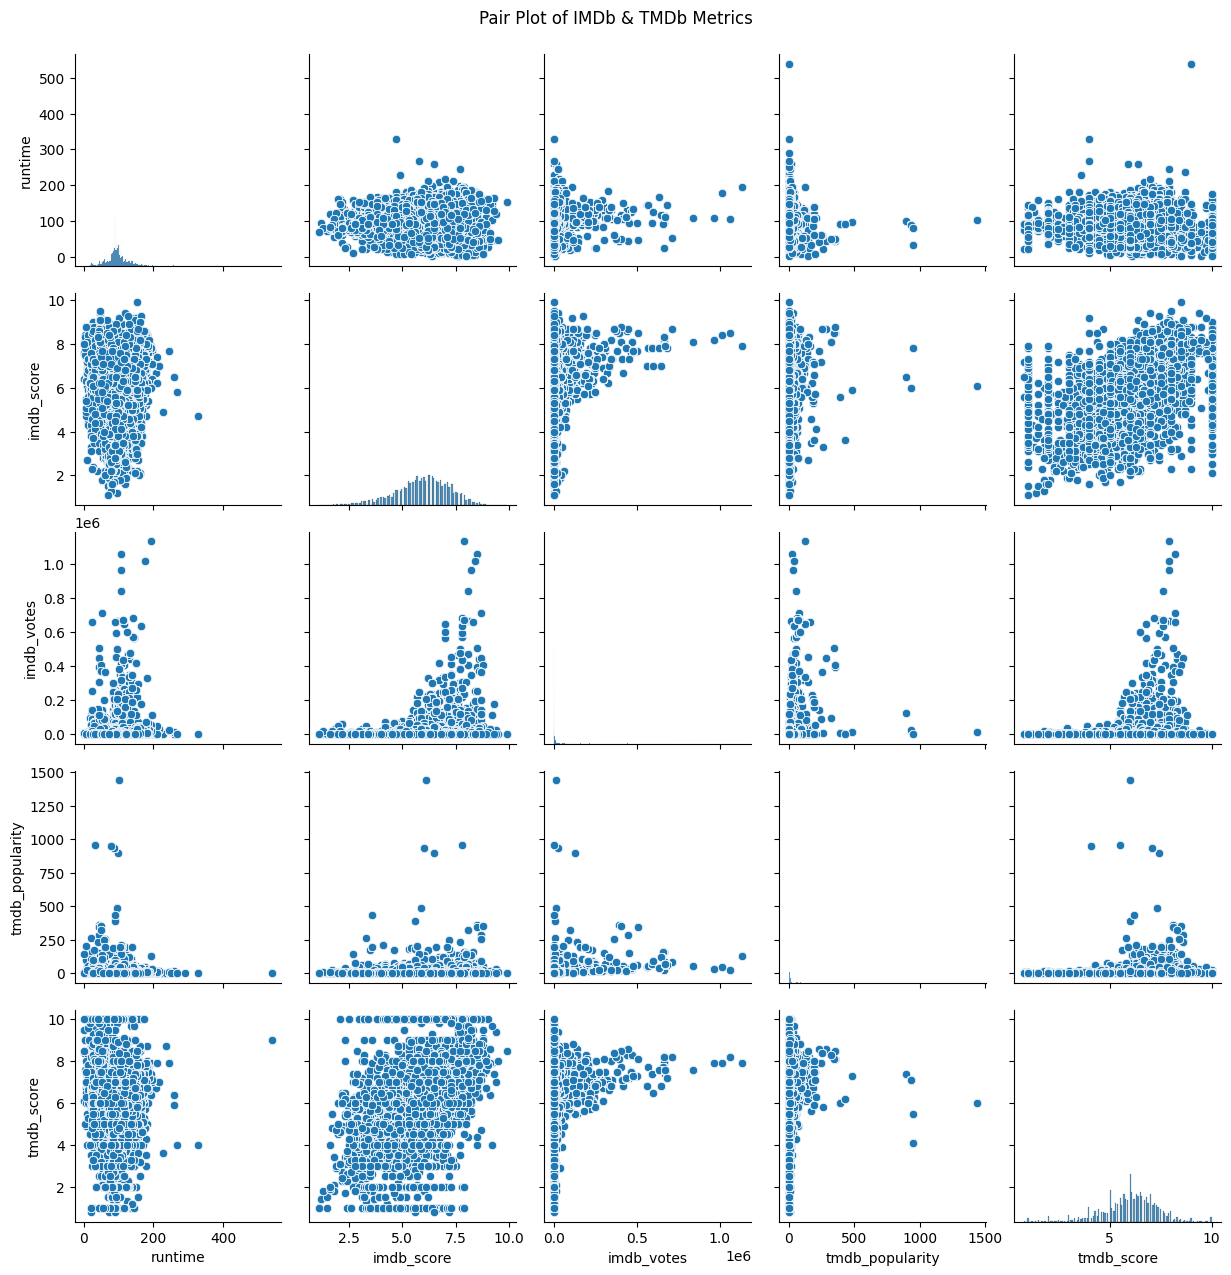

In [ ]:
# Pair plot of selected numerical columns
sns.pairplot(df[num_cols])
plt.suptitle('Pair Plot of IMDb & TMDb Metrics', y=1.02)
plt.show()


**Why this chart?**

A pair plot allows us to visually explore relationships between pairs of numerical variables, revealing patterns, clusters, and potential outliers.

**Insight:**

Some features like TMDb Score are normally distributed, while IMDb Votes are right-skewed. Clusters indicate possible content groups by score and votes.

**Business Impact:**

This guides data-driven decisions in content curation and personalized recommendations by understanding feature distribution and variable interactions.

# **5. Solution to Business Objective**

**What do you suggest the client to achieve Business Objective?**

-> Leverage the high correlation between 'Unit Cost', 'Total Revenue', and 'Total Profit' to implement dynamic pricing models that respond to market trends.

-> Use clustering insights from the hexbin plot to target marketing efforts in high-profit zones.

-> Invest in predictive models that factor in multivariate relationships to forecast sales and profit more accurately.

-> Explore cost minimisation strategies for products or regions that exhibit a poor correlation with revenue generation.

# **Conclusion**

The Amazon Sales Analysis project demonstrates the power of multivariate analysis in uncovering key business drivers hidden within complex datasets. By visualizing relationships among variables and interpreting their significance, we can make well-informed recommendations to boost Amazon’s profitability and market efficiency. The project not only supports current decision-making but also lays the foundation for future data-driven strategies.